### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [66]:
df = pd.read_csv('data/telco_churn_data.csv')

In [68]:
df.head()
print(df['Streaming TV'])

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
7038     No
7039    Yes
7040    Yes
7041     No
7042    Yes
Name: Streaming TV, Length: 7043, dtype: object


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [72]:
df.describe()

Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        7043.000000              7043.000000   
mean                           22.958954                21.110890   
std                            15.448113                20.948471   
min                             0.000000                 0.000000   
25%                             9.210000                 3.000000   
50%                            22.890000                17.000000   
75%                            36.395000                28.000000   
max                            49.990000                94.000000   

       Monthly Charge  Total Regular Charges  Total Refunds  \
count     7043.000000            7043.000000    7043.000000   
mean        65.538800            2280.381264       1.962182   
std         30.606805            2266.220462       7.902614   
min         18.250000              18.800000       0.000000   
25%         35.890000             400.150000       0.000000   
50%         71.968000            1394.550000       0.000000   
75%         90.650000            3786.600000       0.000000   
max        123.084000            8684.800000      49.790000   

       Total Extra Data Charges  Total Long Distance Charges          Age  \
count               7043.000000                  7043.000000  7043.000000   
mean                 278.499225                   749.099262    46.509726   
std                  685.039625                   846.660055    16.750352   
min                    0.000000                     0.000000    19.000000   
25%                    0.000000                    70.545000    32.000000   
50%                    0.000000                   401.440000    46.000000   
75%                  182.620000                  1191.100000    60.000000   
max                 6477.000000                  3564.720000    80.000000   

       Number of Dependents      Zip Code     Latitude    Longitude  \
count           7043.000000   7043.000000  7043.000000  7043.000000   
mean               0.468692  93486.070567    36.197455  -119.756684   
std                0.962802   1856.767505     2.468929     2.154425   
min                0.000000  90001.000000    32.555828  -124.301372   
25%                0.000000  92101.000000    33.990646  -121.788090   
50%                0.000000  93518.000000    36.205465  -119.595293   
75%                0.000000  95329.000000    38.161321  -117.969795   
max                9.000000  96150.000000    41.962127  -114.192901   

          Population  Churn Value         CLTV  Total Customer Svc Requests  \
count    7043.000000  7043.000000  7043.000000                  7043.000000   
mean    22139.603294     0.265370  4400.295755                     1.338776   
std     21152.392837     0.441561  1183.057152                     1.430471   
min        11.000000     0.000000  2003.000000                     0.000000   
25%      2344.000000     0.000000  3469.000000                     0.000000   
50%     17554.000000     0.000000  4527.000000                     1.000000   
75%     36125.000000     1.000000  5380.500000                     2.000000   
max    105285.000000     1.000000  6500.000000                     9.000000   

       Product/Service Issues Reported  Customer Satisfaction  
count                      7043.000000            1834.000000  
mean                          0.308107               3.005453  
std                           0.717514               1.256938  
min                           0.000000               1.000000  
25%               

In [74]:
#lots of Nan in certain columns. so let's drop it
df.isna().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

In [76]:
newdf = df.drop(columns={'Customer ID','Offer','Internet Type','Churn Category','Customer Satisfaction','Churn Reason'})
newdf.isna().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Gender                               0
Age                      

In [78]:
object_cols = newdf.select_dtypes('object').columns.tolist()
object_cols

['Referred a Friend',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Gender',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'City']

In [80]:
#toEncode = newdf.select_dtypes(include=['object']).columns.tolist()  #if we wanted to encode all object type columns
toEncode = ['Multiple Lines','Internet Service','Gender','Married','Dependents']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(newdf[toEncode])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(toEncode))
one_hot_df

Multiple Lines_No  Multiple Lines_Yes  Internet Service_No  \
0                   1.0                 0.0                  0.0   
1                   0.0                 1.0                  0.0   
2                   0.0                 1.0                  0.0   
3                   1.0                 0.0                  0.0   
4                   0.0                 1.0                  0.0   
...                 ...                 ...                  ...   
7038                1.0                 0.0                  1.0   
7039                0.0                 1.0                  0.0   
7040                0.0                 1.0                  0.0   
7041                1.0                 0.0                  0.0   
7042                1.0                 0.0                  0.0   

      Internet Service_Yes  Gender_Female  Gender_Male  Married_No  \
0                      1.0            0.0          1.0         1.0   
1                      1.0            1.0          0.0         0.0   
2                      1.0            0.0          1.0         1.0   
3                      1.0            1.0          0.0         0.0   
4                      1.0            1.0          0.0         0.0   
...                    ...            ...          ...         ...   
7038                   0.0            1.0          0.0         1.0   
7039                   1.0            0.0          1.0         0.0   
7040                   1.0            1.0          0.0         0.0   
7041                   1.0            1.0          0.0         0.0   
7042                   1.0            0.0          1.0         1.0   

      Married_Yes  Dependents_No  Dependents_Yes  
0             0.0            1.0             0.0  
1             1.0            0.0             1.0  
2             0.0            0.0             1.0  
3             1.0            0.0             1.0  
4             1.0            0.0             1.0  
...           ...            ...             ...  
7038          0.0            1.0             0.0  
7039          1.0            0.0             1.0  
7040          1.0            0.0             1.0  
7041          1.0            0.0             1.0  
7042          0.0            1.0             0.0  

[7043 rows x 10 columns]

In [82]:
df_encoded = pd.concat([newdf, one_hot_df], axis=1)

# Drop the original categorical columns to make the df only numerical
df_cleaned = df_encoded.drop(object_cols, axis=1)

In [84]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-null   int64

In [86]:
df_scaled = (df_cleaned - df_cleaned.mean())/df_cleaned.std()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

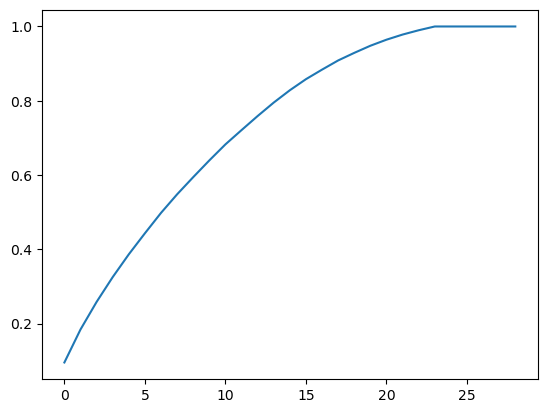

In [88]:
U, s, Vt = svd(df_scaled, full_matrices = False)
Sigma = np.diag(s)

value =  np.cumsum(s)/s.sum()
sns.lineplot(data=value)

In [90]:
#method to see how many columns to keep to retain specific % of detail from original table
percent_variance_explained = s/s.sum()
components = int((np.cumsum(percent_variance_explained) < 0.8).sum())  #how many components to get atleast 80% details
components
#this is how many components to keep

14

<class 'numpy.ndarray'>


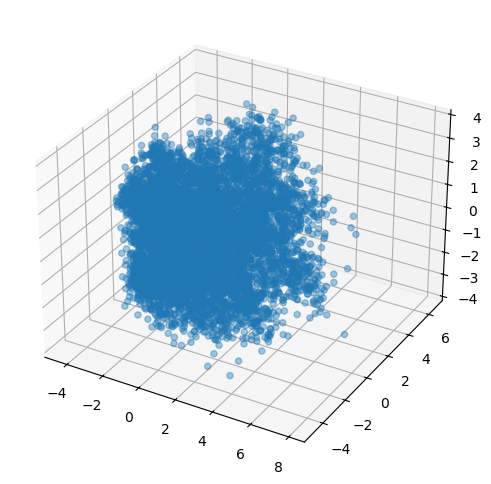

In [92]:
#we should keep atleast 14 components to get at least 80% details

pca = PCA(n_components=14)
pca.fit(df_scaled)
transformed_pca = pca.transform(df_scaled)
print(type(transformed_pca))
plt.figure(figsize=(8,6))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(transformed_pca[:,0], transformed_pca[:,1], transformed_pca[:,2], alpha = 0.4)

## Result of PCA is the transformed_pca

## Looking at Kmeans

In [96]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

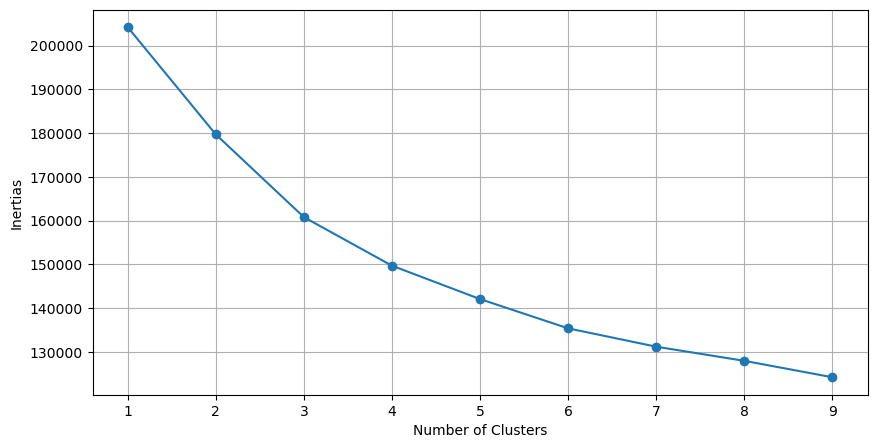

In [173]:
optimize_k_means(df_scaled, 10)

In [175]:
kmeans = KMeans(n_clusters=4, random_state= 42)
#cluster_labels = kmeans.fit_predict(df_scaled)
#cluster_labels
kmeans.fit(df_scaled)
newdf['clusters'] = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


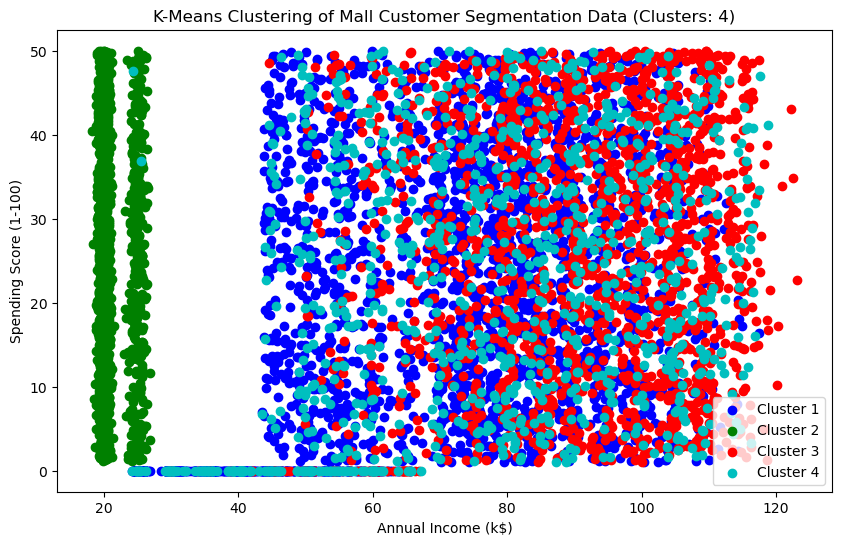

In [179]:
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i in range(4):
    cluster_data = newdf[newdf['clusters'] == i]
    plt.scatter(cluster_data['Monthly Charge'], cluster_data['Avg Monthly Long Distance Charges'],
                color=colors[i], label=f'Cluster {i + 1}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering of Mall Customer Segmentation Data (Clusters: 4)')
plt.legend()
plt.show()

## final dataframe with all original data (minus the null value columns) and the kmeans_7 category column

In [112]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Phone Service                      7043 non-null   object 
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Multiple Lines                     7043 non-null   object 
 6   Internet Service                   7043 non-null   object 
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Online Security                    7043 non-null   object 
 9   Online Backup                      7043 non-null   object 
 10  Device Protection Plan             7043 non-null   object 
 11  Premium Tech Support               7043 non-null   objec

In [114]:
newdf['kmeans_7'].value_counts()

kmeans_7
2    1254
0    1238
1    1174
5     963
4     957
6     894
3     563
Name: count, dtype: int64

In [149]:
#making sure we don't have null values
newdf.isna().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Gender                               0
Age                      

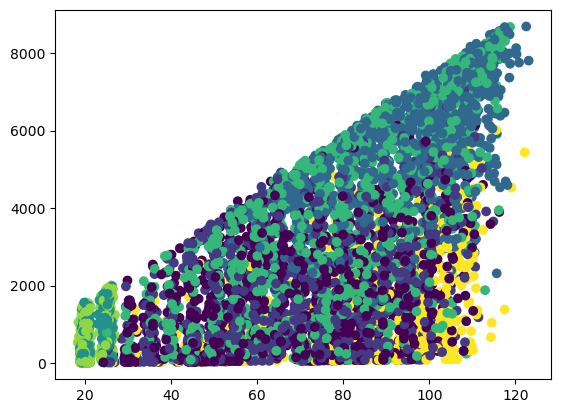

In [163]:
plt.scatter(x=newdf['Monthly Charge'], y=newdf['Total Regular Charges'],c=newdf['kmeans_7'])

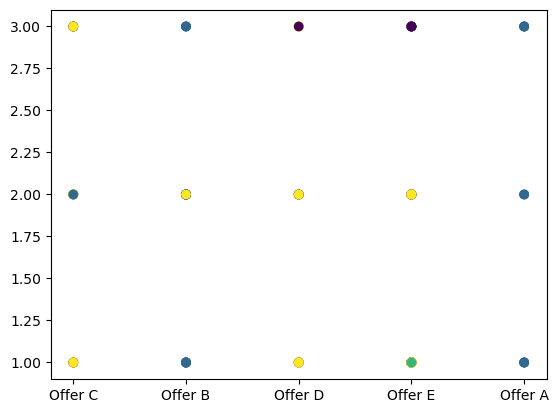

In [62]:
plt.scatter(x=df['Offer'], y=df['Customer Satisfaction'],c=df['kmeans_7'])

In [140]:
groupedDf = newdf.groupby(['kmeans_7'])[['Tenure in Months','Avg Monthly Long Distance Charges']]
groupedDf.head()

Tenure in Months  Avg Monthly Long Distance Charges
0                    1                               0.00
1                    8                              48.85
2                   18                              11.33
3                   25                              19.76
4                   37                               6.33
5                   27                               3.33
6                    1                              15.28
7                   58                               0.00
8                   15                              44.07
9                    7                              26.95
10                  11                              11.59
11                  15                              29.11
13                   3                               0.00
25                  11                              29.54
26                  55                              42.82
35                  65                              18.39
36                  49                              22.92
37                  43                              14.52
38                  56                              48.80
41                   8                              27.95
51                  20                               5.37
66                   3                              25.77
67                   8                              42.93
68                  14                              11.31
72                  17                              28.18
199                  1                              22.92
322                  4                              42.13
373                  1                              19.87
375                  1                              22.86
421                 22                               0.00
770                 68                              35.14
921                 71                              32.12
1055                64                              37.09
1669                 1                              11.91
1807                11                              29.01

In [144]:
sns.scatterplot(data = groupedDf, x='Avg Monthly Long Distance Charges', y='Tenure in Months')

ValueError: Could not interpret value `Avg Monthly Long Distance Charges` for parameter `x`